# Student Success and Failure Lookalike Project

School is one of the best ways to raise individuals' earnings potentials. If we can identify students who are at risk in school, it's possible we could intervene beforehand. If we can identify "lookalike's" of students that fail, we could intervene with these students and tailor solutions based on identifiers.

_"A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes._

_Data Source: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success_

This dataset was provided by the Polytechnic Institute of Portalegre and SATDAP - Capacitação da Administração Pública.

Citation: M.V.Martins, D. Tolledo, J. Machado, L. M.T. Baptista, V.Realinho. (2021) "Early prediction of student’s performance in higher education: a case study" Trends and Applications in Information Systems and Technologies, vol.1, in Advances in Intelligent Systems and Computing series. Springer. DOI: 10.1007/978-3-030-72657-7_16

Note: While this group certainly did their own prediction, I have not and will not read the paper until after I complete my own data model.

<div style="margin-left: 50px;">
    <img src="~/student_success/poly_screenshot.png" width="600" />
</div>

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin
import joblib

SD = 42

In [3]:
#pulling in the data for an initial first pass
datapath = './data/student_data.csv'
raw_df = pd.read_csv(datapath, low_memory=False, delimiter=';')
print(raw_df.shape)
#display(raw_df.head())
#display(raw_df.info())

(4424, 37)


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(raw_df['Target'])
target_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Target Column Conversion: {target_map}")

def target_mapping(x):
    y = target_map[x]
    return(y)

raw_df["Target"] = raw_df["Target"].apply(target_mapping)
#display(raw_df.head())

X_temp, X_val, y_temp, y_val = train_test_split(raw_df[[c for c in raw_df.columns if c!="Target"]], raw_df['Target'], stratify=raw_df['Target'], test_size=0.1, random_state=SD)
print(f"Validation shape: {X_val.shape}")
splits = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.2, random_state=SD)
print(f"Split shape: {splits[0].shape}")


#print(f"Raw DF")
#raw_df = pd.concat([X_train, y_train],axis=1)
#print(raw_df.shape)
#display(raw_df.sample(3))

#print(f"Validation DF")
#validation_df = pd.concat([X_val, y_val],axis=1)
#display(X_val.head())
#print(validation_df.shape)
#display(validation_df.sample(3))
#dist_of_targ = raw_df.reset_index()[['Target','index']].groupby('Target').count().reset_index()
#dist_of_targ['percent'] = dist_of_targ['index'].div(dist_of_targ['index'].sum())
#display(dist_of_targ)

Target Column Conversion: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
Validation shape: (443, 36)
Split shape: (3184, 36)


In [34]:
dropout_df = raw_df.copy()
dropout_df['true_target'] = dropout_df['Target']
dropout_df['Target'] = np.where(dropout_df['Target']==0,1,0)

enrolled_df = raw_df.copy()
enrolled_df['Target'] = np.where(enrolled_df['Target']==1,1,0)

graduate_df = raw_df.copy()
graduate_df['Target'] = np.where(graduate_df['Target']==2,1,0)

base = raw_df.copy()

# Dropout - 0

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,true_target
2654,1,17,5,9500,1,1,124.0,1,3,38,...,8,11,7,13.867143,0,10.8,1.4,1.74,0,2
4066,1,1,1,9556,1,1,118.0,1,19,38,...,8,10,8,11.956250,0,12.7,3.7,-1.70,0,2
1538,1,18,5,9853,1,1,121.0,1,38,19,...,6,14,3,11.666667,0,10.8,1.4,1.74,1,0
601,1,17,5,9070,1,1,122.0,1,19,38,...,6,8,4,11.600000,0,10.8,1.4,1.74,1,0
1233,1,17,2,9773,1,1,133.1,1,3,1,...,6,6,6,12.666667,0,16.2,0.3,-0.92,0,2


Train/Test Split provided
Fitting 5 folds for each of 1 candidates, totalling 5 fits
RMSE: 0.6720817301078739
Accuracy Score: 0.7628607277289837


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


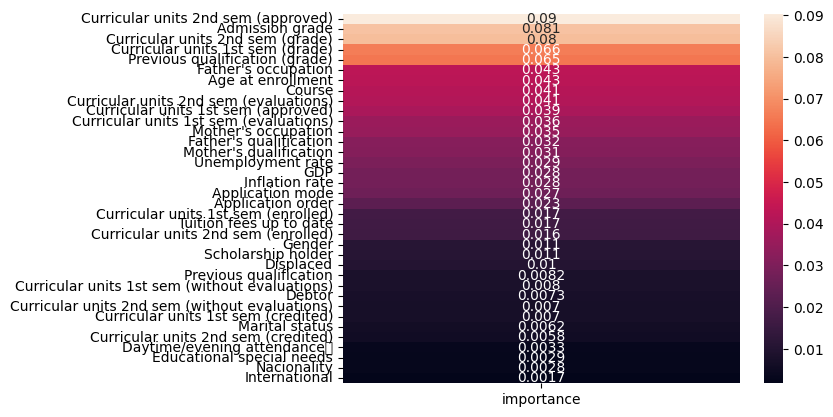

Train/Test Split provided
Fitting 5 folds for each of 1 candidates, totalling 5 fits
RMSE: 0.6512221884813116
Accuracy Score: 0.7641154328732748


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


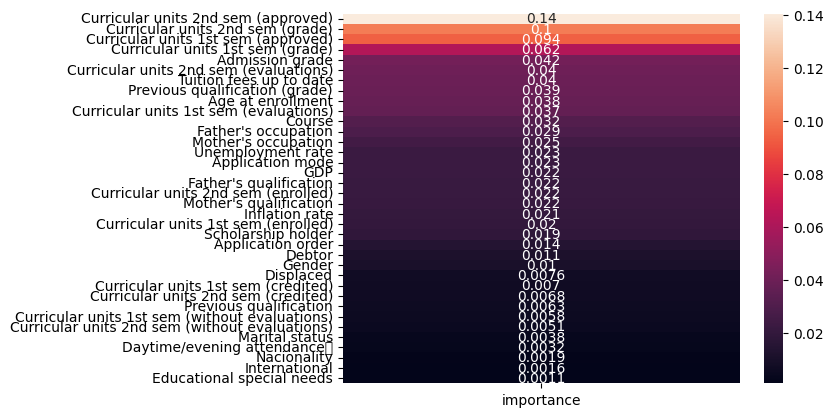

['./models/dropout_rf.pkl']

In [35]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

#Local package
from utilClassifier import Classifier

dropout_clean_df = dropout_df.copy()
display(dropout_clean_df[[]])
y = 'Target'
xlist = [x for x in list(dropout_clean_df.columns) if x != y] 

##W/O Normalization
#Gradient Boosting
gparams = {
    'n_estimators':[250],#[100, 250, 500, 1000],
    'max_depth': [20],#[1, 10, 20],
    'subsample':[0.25],#[0.25,0.5,0.8],
    'max_features':[0.5]#[0.25, 0.5, 0.8]
}
dropout_gb_class = Classifier(data=dropout_clean_df, X=xlist, y=y, 
                      estimator=GradientBoostingClassifier, 
                      gparams_dict=gparams,
                      normalize = False,
                      train_test_tuple=splits
                     )
dropout_gb_class = dropout_gb_class.fitModel().showMetrics()
dropout_gb_class = dropout_gb_class.showFeatureImportance()
joblib.dump(dropout_gb_class.gscv_.best_estimator_, "./models/dropout_gb.pkl")

#RFC
rfparams = {
    "n_estimators":[100],#10,50,100,200],
    "max_depth":[20],#1,5,10,20],#,50,100],
    "min_samples_split":[2]#,5,10]
}
dropout_rf_class = Classifier(data=dropout_clean_df, X=xlist, y=y, 
                      estimator=RandomForestClassifier, gparams_dict=rfparams,
                      normalize = False, train_test_tuple=splits)

#display(dropout_rf_class.X_test[:5])
dropout_rf_class = dropout_rf_class.fitModel().showMetrics()
dropout_rf_class = dropout_rf_class.showFeatureImportance()
joblib.dump(dropout_rf_class.gscv_.best_estimator_, "./models/dropout_rf.pkl")


# Enrolled - 1

Train/Test Split provided
Fitting 5 folds for each of 1 candidates, totalling 5 fits
RMSE: 0.6720817301078739
Accuracy Score: 0.7628607277289837


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


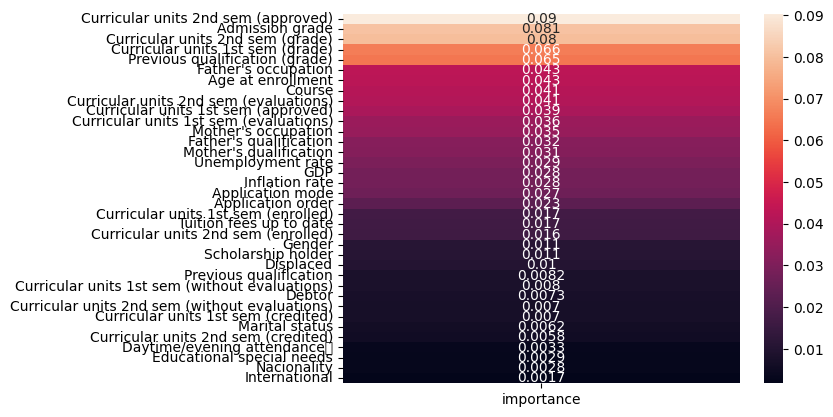

Train/Test Split provided
Fitting 5 folds for each of 1 candidates, totalling 5 fits
RMSE: 0.6512221884813116
Accuracy Score: 0.7641154328732748


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


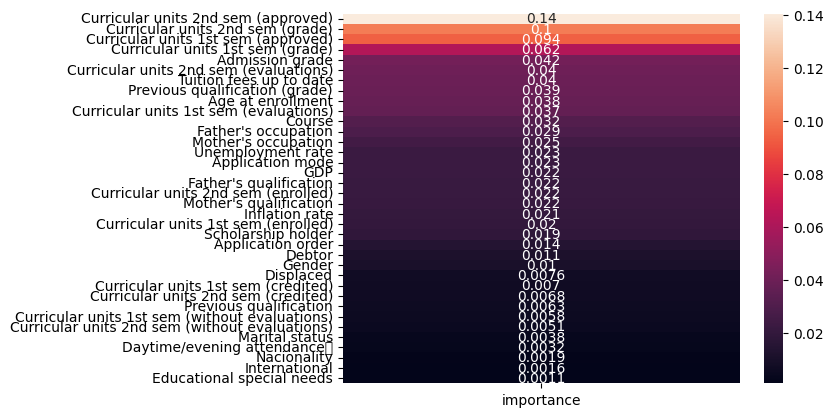

['./models/enrolled_rf.pkl']

In [7]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

#Local package
from utilClassifier import Classifier

enrolled_clean_df = enrolled_df.copy()
y = 'Target'
xlist = [x for x in list(enrolled_clean_df.columns) if x != y] 

##W/O Normalization
#Gradient Boosting
gparams = {
    'n_estimators':[250],#[100, 250, 500, 1000],
    'max_depth': [20],#[1, 10, 20],
    'subsample':[0.25],#[0.25,0.5,0.8],
    'max_features':[0.5]#[0.25, 0.5, 0.8]
}
enrolled_gb_class = Classifier(data=enrolled_clean_df, X=xlist, y=y, 
                      estimator=GradientBoostingClassifier, 
                      gparams_dict=gparams,
                      normalize = False,
                      train_test_tuple=splits
                    )
enrolled_gb_class = enrolled_gb_class.fitModel().showMetrics()
enrolled_gb_class = enrolled_gb_class.showFeatureImportance()
joblib.dump(enrolled_gb_class.gscv_.best_estimator_, "./models/enrolled_gb.pkl")

#RFC
rfparams = {
    "n_estimators":[100],#10,50,100,200],
    "max_depth":[20],#1,5,10,20],#,50,100],
    "min_samples_split":[2]#,5,10]
}
enrolled_rf_class = Classifier(data=enrolled_clean_df, X=xlist, y=y, 
                      estimator=RandomForestClassifier, gparams_dict=rfparams,
                      normalize = False, train_test_tuple=splits)
#display(enrolled_rf_class.X_test[:5])
enrolled_rf_class = enrolled_rf_class.fitModel().showMetrics()
enrolled_rf_class = enrolled_rf_class.showFeatureImportance()
joblib.dump(enrolled_rf_class.gscv_.best_estimator_, "./models/enrolled_rf.pkl")

# Graduated - 2

Train/Test Split provided
Fitting 5 folds for each of 1 candidates, totalling 5 fits
RMSE: 0.6720817301078739
Accuracy Score: 0.7628607277289837


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


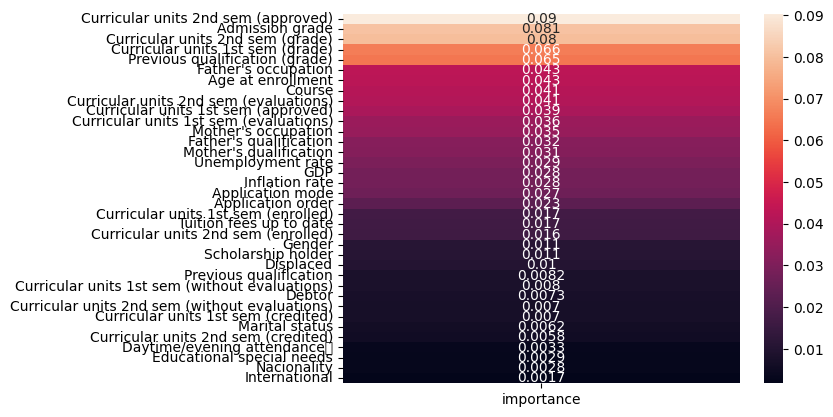

Train/Test Split provided
Fitting 5 folds for each of 1 candidates, totalling 5 fits
RMSE: 0.6512221884813116
Accuracy Score: 0.7641154328732748


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


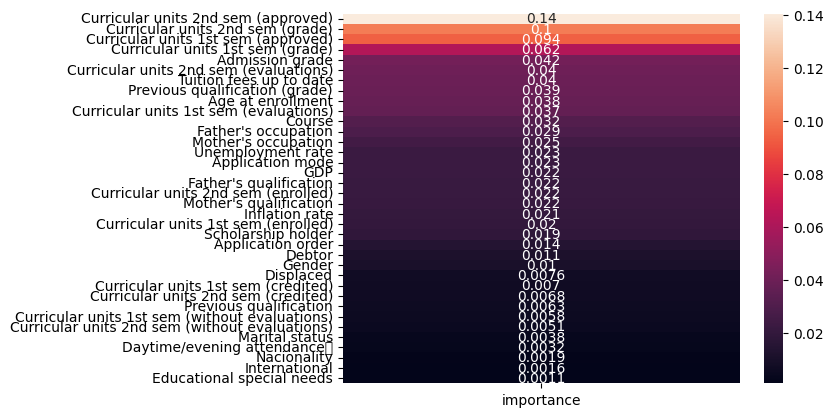

['./models/graduated_rfr.pkl']

In [8]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

#Local package
from utilClassifier import Classifier

graduated_clean_df = graduate_df.copy()
y = 'Target'
xlist = [x for x in list(graduated_clean_df.columns) if x != y] 

##W/O Normalization
#Gradient Boosting
gparams = {
    'n_estimators':[250],#[100, 250, 500, 1000],
    'max_depth': [20],#[1, 10, 20],
    'subsample':[0.25],#[0.25,0.5,0.8],
    'max_features':[0.5]#[0.25, 0.5, 0.8]
}
graduated_gb_class = Classifier(data=graduated_clean_df, X=xlist, y=y, 
                      estimator=GradientBoostingClassifier, 
                      gparams_dict=gparams,
                      normalize = False, 
                      train_test_tuple=splits
                    )
graduated_gb_class = graduated_gb_class.fitModel().showMetrics()
graduated_gb_class = graduated_gb_class.showFeatureImportance()
joblib.dump(graduated_gb_class.gscv_.best_estimator_, "./models/graduated_gb.pkl")

#RFC
rfparams = {
    "n_estimators":[100],#10,50,100,200],
    "max_depth":[20],#1,5,10,20],#,50,100],
    "min_samples_split":[2]#,5,10]
}
graduated_rf_class = Classifier(data=graduated_clean_df, X=xlist, y=y, 
                      estimator=RandomForestClassifier, gparams_dict=rfparams,
                      normalize = False, train_test_tuple=splits)

#display(rf_class.X_test[:5])
graduated_rf_class = graduated_rf_class.fitModel().showMetrics()
graduated_rf_class = graduated_rf_class.showFeatureImportance()
joblib.dump(graduated_rf_class.gscv_.best_estimator_, "./models/graduated_rfr.pkl")

# Base Model

Train/Test Split provided


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
514,2,18,2,8014,0,1,140.0,1,37,37,...,0,0,4,4,0,0.000000,0,9.4,-0.8,-3.12
4416,1,43,2,9500,1,1,136.0,1,38,38,...,1,11,14,15,12,12.625000,1,7.6,2.6,0.32
2744,1,39,1,9254,1,1,133.1,1,19,19,...,0,0,6,7,5,11.000000,0,13.9,-0.3,0.79
1307,1,17,3,9147,1,1,147.0,1,19,38,...,0,0,5,6,5,12.200000,0,12.7,3.7,-1.70
1624,1,42,1,9853,1,1,120.0,1,1,19,...,0,7,13,18,9,10.444444,0,16.2,0.3,-0.92


Fitting 5 folds for each of 1 candidates, totalling 5 fits
RMSE: 0.6512221884813116
Accuracy Score: 0.7641154328732748


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


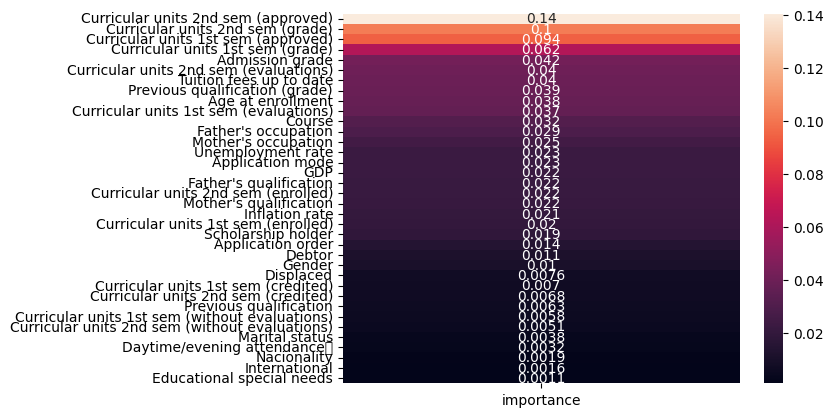

['./models/base_rf.pkl']

In [9]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

#Local package
from utilClassifier import Classifier

clean_df = base.copy()
y = 'Target'
xlist = [x for x in list(clean_df.columns) if x != y] 

###W/O Normalization
##Gradient Boosting
#gparams = {
#    'n_estimators':[250],#[100, 250, 500, 1000],
#    'max_depth': [20],#[1, 10, 20],
#    'subsample':[0.25],#[0.25,0.5,0.8],
#    'max_features':[0.5]#[0.25, 0.5, 0.8]
#}
#gb_class = Classifier(data=clean_df, X=xlist, y=y, 
#                      estimator=GradientBoostingClassifier, 
#                      gparams_dict=gparams,
#                      normalize = False)
#gb_class = gb_class.fitModel().showMetrics()
#gb_class = gb_class.showFeatureImportance()

#RFC
rfparams = {
    "n_estimators":[100],#10,50,100,200],
    "max_depth":[20],#1,5,10,20],#,50,100],
    "min_samples_split":[2]#,5,10]
}
rf_class = Classifier(data=clean_df, X=xlist, y=y, 
                      estimator=RandomForestClassifier, gparams_dict=rfparams,
                      normalize = False, train_test_tuple=splits)

display(rf_class.X_test[:5])
rf_class = rf_class.fitModel().showMetrics()
rf_class = rf_class.showFeatureImportance()
joblib.dump(rf_class.gscv_.best_estimator_, "./models/base_rf.pkl")

# Voting

In [10]:
#Check if classes are loaded. if not, then load.
models = ['dropout_gb_class','dropout_rf_class','enrolled_gb_class','enrolled_rf_class','graduated_gb_class','graduated_rf_class','rf_class']

def loadModels(model_list):
    for m in models:
        print(f"Model: {m}")
        if m in globals():
            print("Already loaded")
            print("\n")
            try:
                globals()[m] = globals()[m].gscv_.best_estimator_
            except AttributeError:
                True
        else:
            print("Loading model")
            globals()[m] = joblib.load(f"./models/{m}.pkl")
    return(None)
            
loadModels(models)

Model: dropout_gb_class
Already loaded


Model: dropout_rf_class
Already loaded


Model: enrolled_gb_class
Already loaded


Model: enrolled_rf_class
Already loaded


Model: graduated_gb_class
Already loaded


Model: graduated_rf_class
Already loaded


Model: rf_class
Already loaded




In [31]:
def makePrediction(model, X, target_class):
    #make the prediction
    preds = model.predict(X)
    #revert target class and 0 to None
    #preds = np.where(preds==1, target_class, None)
    #return the preds
    return(preds)
    
    
    
#Take the validation set and show it to the first 6 models
eval_df = pd.DataFrame()

models = [dropout_gb_class, dropout_rf_class,
            enrolled_gb_class, enrolled_rf_class,
            graduated_gb_class,graduated_rf_class
         ]

eval_df['y_val'] = y_val
#return a dataframe with their predictions
eval_df['dropout_gb_preds'] = makePrediction(dropout_gb_class, X_val, 0)
eval_df['dropout_rf_preds'] = makePrediction(dropout_rf_class, X_val, 0)

eval_df['enrolled_gb_preds'] = makePrediction(enrolled_gb_class, X_val, 1)
eval_df['enrolled_rf_preds'] = makePrediction(enrolled_rf_class, X_val, 1)

eval_df['graduated_gb_preds'] = makePrediction(graduated_gb_class, X_val, 2)
eval_df['graduated_rf_preds'] = makePrediction(graduated_rf_class, X_val, 2)

eval_df.to_csv('./models/predictions.csv')
#display(eval_df.head(10))

#display(eval_df.loc[eval_df.loc[:,'y_val']==0])


#Take the validation set and show it to the final base model

#add the predictions to the dataframe

#visualize their decisions.

In [32]:
from IPython.display import FileLink
display(FileLink('./models/predictions.csv'))

/notebooks/student_success/models/predictions.csv

In [ ]:
# Get the incorrect predictions with the lowest confidence in their true class
misses = [(i, rf_class.y_test.iloc[i], rf_class.y_preds[i], rf_class.y_proba[i].max()) for i in rf_class.misclassified_idx]

dist_misses = [i[1] for i in misses]

zero = 0
one = 0
two = 0

for m in dist_misses:
    if m == 0:
        zero+=1
    if m == 1:
        one += 1
    if m ==2:
        two += 1

print(zero)
print(zero/(zero+one+two))
print(one)
print(one/(zero+one+two))
print(two)
print(two/(zero+one+two))

least_conf_misses = sorted(misses, key=lambda x: x[3])[:10]  # Least confident misses
highest_conf_misses = sorted(misses, key=lambda x: x[3])[-10:]  # Highest confident misses


for i, true_label, pred_label, confidence in least_conf_misses:
    print(f"Low-Conf -- Index: {i}, True: {true_label}, Predicted: {pred_label}, Confidence: {confidence}")

print("\n")
for i, true_label, pred_label, confidence in highest_conf_misses:
    print(f"High-Conf -- Index: {i}, True: {true_label}, Predicted: {pred_label}, Confidence: {confidence}")

The RF model's least confident misses are for Graduates: 2's (who or either still enrolled or dropped out).

The model's most confident misses are with Enrolled: 1's (who are most frequently dropped out).
It's also more likely to get Enrolled: 1's wrong which only make up 17% of our original data, but 50% of our misses (despite stratifying the train/test split). 

Some ways to improve:
    - One possibility could be to try to train three different models to predict each target.
    - Look for features that correlate with enrolled target and try to weigh those more heavily or find more features similar to that. Engineer features that could push the model further in that regard.

In [ ]:
#print(gs.best_params_)
rf = gs.best_estimator_
features = dict(zip(list(clean_df.columns[:-1]), rf.feature_importances_))
features = pd.DataFrame(pd.Series(features))
features.columns = ['importance']
features = features.sort_values(by='importance', ascending=False)
#display(features)

ax = sns.heatmap(features, annot=True)
ax.set_yticks(np.arange(len(features)) + 0.5)
ax.set_yticklabels(features.index, rotation=0)
plt.show()